In [1]:
from src.dataset_utils import Dataset
from src.model import Autoencoder, train
import src.visualization_utils as vu

# Prepare Dataset

In [3]:
DATA_DIR = 'raw-img'

In [4]:
data = Dataset(DATA_DIR)
data.prepare_train_data()

# Visualize Data

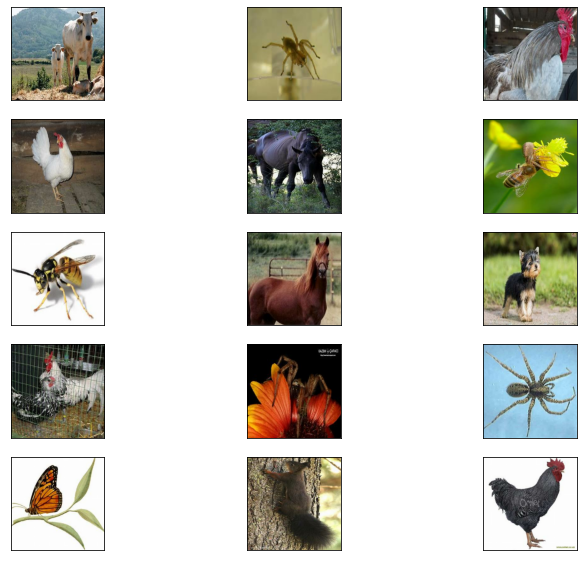

In [6]:
vu.visualize_sample(ds = data.val_ds, ncol=3, sample_size=15)

# Train the model

In [10]:
autoencoder = Autoencoder()
train(model=autoencoder,train_ds=data.train_ds, val_ds=data.val_ds)

Epoch 1/100
606/606 [==============================] - ETA: 0s - loss: 803.4327
Epoch 1: val_loss improved from inf to 373.81500, saving model to model/cnn_ae\cp.ckpt
606/606 [==============================] - 173s 273ms/step - loss: 803.4327 - val_loss: 373.8150
Epoch 2/100
605/606 [============================>.] - ETA: 0s - loss: 364.0800
Epoch 2: val_loss improved from 373.81500 to 365.16415, saving model to model/cnn_ae\cp.ckpt
606/606 [==============================] - 48s 80ms/step - loss: 364.0969 - val_loss: 365.1642
Epoch 3/100
605/606 [============================>.] - ETA: 0s - loss: 328.8912
Epoch 3: val_loss improved from 365.16415 to 304.49213, saving model to model/cnn_ae\cp.ckpt
606/606 [==============================] - 45s 75ms/step - loss: 328.8802 - val_loss: 304.4921
Epoch 4/100
605/606 [============================>.] - ETA: 0s - loss: 311.0050
Epoch 4: val_loss improved from 304.49213 to 300.15335, saving model to model/cnn_ae\cp.ckpt
606/606 [==================

# See autoencoder result

In [11]:
autoencoder = Autoencoder()
autoencoder.load_weights('model/cnn_ae/cp.ckpt')

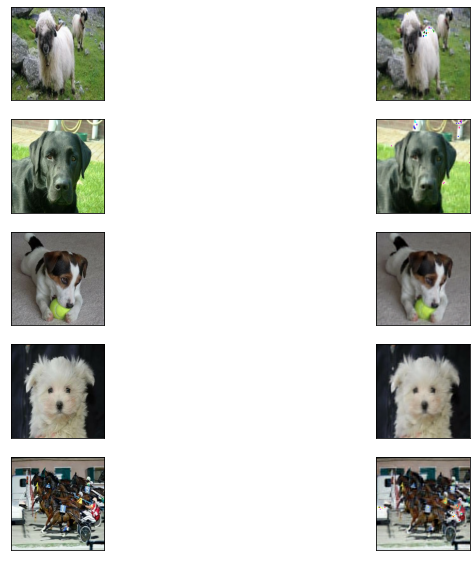

In [12]:
#sample size need to be even number
#the left side is the original and the right side is autoencoder result
vu.visualize_difference(ds=data.val_ds, sample_size=6, autoencoder=autoencoder)

# Interpolate between two image

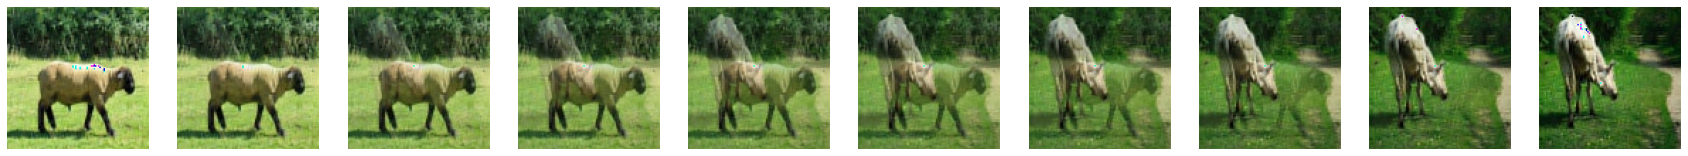

In [13]:
vu.interpolate(ds=data.val_ds,autoencoder=autoencoder,interpolate_step=10)

# AE For Denoising

In [2]:
DATA_DIR = 'raw-img'

In [3]:
data = Dataset(DATA_DIR)
data.prepare_train_data()

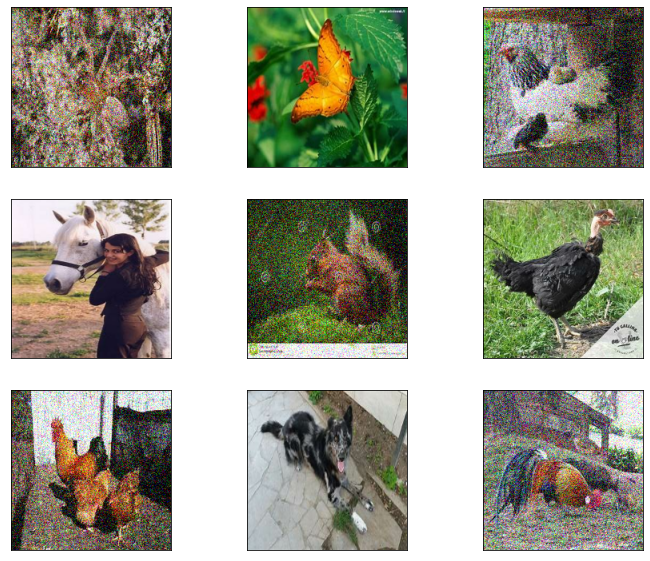

In [4]:
vu.visualize_sample(data.val_ds,3 ,9)

In [5]:
autoencoder = Autoencoder()
train(model=autoencoder,train_ds=data.train_ds, val_ds=data.val_ds)

Epoch 1/100
359/606 [================>.............] - ETA: 57s - loss: 848.5137

In [ ]:
#if the model is already trained
autoencoder = Autoencoder()
autoencoder.load_weights('model/cnn_ae_noisy/cp.ckpt')
vu.visualize_difference(ds=data.val_ds, sample_size=6, autoencoder=autoencoder)